In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from patsy import dmatrices
pd.options.display.mpl_style = 'default'
from survival  import query_classification_data,cv, cvcv
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler



In [2]:
d_150k = query_classification_data(horizon_month = '2009-04-30',\
                                   prediction_month_end ='2009-05-31', \
                                   prediction_month_start='2009-05-31',\
                                   n = 150000 )

OperationalError: (2003, "Can't connect to MySQL server on '127.0.0.1' (61)")

In [33]:
d_150k.to_csv('d_150k_reduced.csv')
#d_150k = pd.read_csv('d_150k.csv')


In [3]:
d_150k['survive'].value_counts()

0    102842
1     47158
dtype: int64

In [5]:
d_50k = d_150k[:50000]

In [6]:
d_50k['survive'].value_counts()

1    25300
0    24700
dtype: int64

In [7]:
d_5k = d_150k[:5000]

In [8]:
d_5k['survive'].value_counts()

1    2705
0    2295
dtype: int64

In [29]:
scoring = 'roc_auc'
folds = 2
d_150k.dtypes

friend_count                        float64
months_since_5_edits                float64
months_since_registration             int64
num_edits_0                           int64
num_edits_1                           int64
num_edits_2                           int64
num_edits_3                           int64
num_edits_got_archived_to_date_0    float64
num_edits_got_reverted_to_date_0    float64
num_edits_rest                        int64
num_edits_to_date_0                 float64
num_edits_to_date_1                 float64
num_edits_to_date_2                 float64
num_edits_to_date_3                 float64
num_edits_to_date_tot                object
num_edits_total                       int64
survive                               int64
talk_counts                          object
dtype: object

In [30]:
d = d_150k.fillna(0)
y = d["survive"].values
d = d.drop('survive', axis=1)
X = d.values
scaler = StandardScaler().fit(X)
X_standard = scaler.transform(X) 

In [20]:
d_150k.fillna(0).head(10)

,friend_count,months_since_5_edits,months_since_registration,num_edits_0,num_edits_1,num_edits_2,num_edits_3,num_edits_rest,num_edits_to_date_0,num_edits_to_date_1,num_edits_to_date_2,num_edits_to_date_3,num_edits_to_date_tot,num_edits_total,survive,talk_counts
0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0
1,0,22,25,0,0,0,1,0,2,0,0,11,13,1,0,0
2,0,10,34,3,0,0,0,0,67,6,0,1,78,3,1,0
3,0,0,12,8,0,0,0,0,96,15,6,1,140,8,1,0
4,0,0,0,3,0,0,0,0,3,0,0,0,3,3,0,0
5,0,8,30,1,0,0,0,0,48,0,0,0,54,1,1,0
6,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0
7,0,0,3,1,0,4,1,0,4,0,4,2,10,6,0,0
8,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
9,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0


In [31]:
d_150k.fillna(0).corr()

,friend_count,months_since_5_edits,months_since_registration,num_edits_0,num_edits_1,num_edits_2,num_edits_3,num_edits_got_archived_to_date_0,num_edits_got_reverted_to_date_0,num_edits_rest,num_edits_to_date_0,num_edits_to_date_1,num_edits_to_date_2,num_edits_to_date_3,num_edits_total,survive,talk_counts
friend_count,1.000000,-0.009378,0.023524,0.248690,0.016241,0.043957,0.535781,0.078940,0.230430,0.035111,0.081053,0.019399,0.018305,0.189636,0.271031,0.040686,NaN
months_since_5_edits,-0.009378,1.000000,0.381705,-0.024520,-0.005537,-0.009589,-0.009915,-0.011200,-0.010873,-0.006033,-0.017336,-0.010258,-0.007489,-0.010861,-0.021428,-0.027018,NaN
months_since_registration,0.023524,0.381705,1.000000,0.055712,0.009109,0.013506,0.020767,0.076072,0.060280,0.016558,0.108188,0.057362,0.040620,0.054015,0.047341,0.364379,NaN
num_edits_0,0.248690,-0.024520,0.055712,1.000000,0.075164,0.118228,0.378699,0.625362,0.349149,0.103964,0.740964,0.089814,0.128862,0.293425,0.701323,0.095117,NaN
num_edits_1,0.016241,-0.005537,0.009109,0.075164,1.000000,0.024488,0.065693,0.032725,0.016421,0.031944,0.052626,0.593001,0.014697,0.062693,0.497140,0.023799,NaN
num_edits_2,0.043957,-0.009589,0.013506,0.118228,0.024488,1.000000,0.052715,0.074860,0.023968,0.042106,0.172717,0.019312,0.869277,0.104885,0.219274,0.033491,NaN
num_edits_3,0.535781,-0.009915,0.020767,0.378699,0.065693,0.052715,1.000000,0.122610,0.775456,0.053087,0.205196,0.130442,0.060293,0.724807,0.466380,0.040095,NaN
num_edits_got_archived_to_date_0,0.078940,-0.011200,0.076072,0.625362,0.032725,0.074860,0.122610,1.000000,0.174570,0.086576,0.853664,0.085379,0.109283,0.191815,0.419921,0.061291,NaN
num_edits_got_reverted_to_date_0,0.230430,-0.010873,0.060280,0.349149,0.016421,0.023968,0.775456,0.174570,1.000000,0.023001,0.299060,0.048653,0.071672,0.755745,0.364966,0.052573,NaN
num_edits_rest,0.035111,-0.006033,0.016558,0.103964,0.031944,0.042106,0.053087,0.086576,0.023001,1.000000,0.093062,0.051367,0.042978,0.049255,0.590389,0.025064,NaN


(array([ 1820.,  1120.,   788.,   600.,   461.,   391.,   312.,   271.,
          258.,   191.,   198.,   171.,   149.,   153.,   151.,   105.,
          100.,   104.,    91.,    77.]),
 array([  41. ,   53.9,   66.8,   79.7,   92.6,  105.5,  118.4,  131.3,
         144.2,  157.1,  170. ,  182.9,  195.8,  208.7,  221.6,  234.5,
         247.4,  260.3,  273.2,  286.1,  299. ]),
 <a list of 20 Patch objects>)

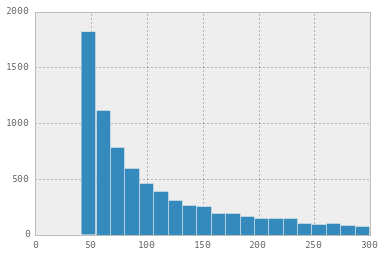

In [36]:
import matplotlib.pyplot as plt
edits = d_150k['cla_tot']
edits = edits[edits>40]
edits = edits[edits<300]

plt.hist(edits.values, bins=20)

In [7]:
clf = LinearSVC()
param_grid  = {'C' : [ 0.01, 0.1, 1, 5, 10] }
model = cv (X, y, folds, clf, param_grid, scoring)




Doing Gridsearch

Best Model Train ROC AUC: 0.650662
Best Model Train F1: 0.293546

Best parameters set found:
({'C': 0.1}, 0.70040945180582037)


Grid scores:
0.524 (+/-0.117) for {'C': 0.01}
0.700 (+/-0.002) for {'C': 0.1}
0.546 (+/-0.103) for {'C': 1}
0.556 (+/-0.115) for {'C': 5}
0.593 (+/-0.092) for {'C': 10}


In [7]:
clf = LogisticRegression()
param_grid  = {'C' : [0.1, 1, 5, 100] }
model = cv (X_standard, y, folds, clf, param_grid, scoring)




Doing Gridsearch

Best Model Train ROC AUC: 0.791098
Best Model Train F1: 0.520888

Best parameters set found:
({'C': 1}, 0.52014667353868416)


Grid scores:
0.520 (+/-0.001) for {'C': 0.1}
0.520 (+/-0.001) for {'C': 1}
0.520 (+/-0.001) for {'C': 5}
0.520 (+/-0.001) for {'C': 100}


In [32]:
clf = RandomForestClassifier()
param_grid  = {'n_estimators' : [40], 'max_features' : ['log2'] }
model = cv (X, y, folds, clf, param_grid, scoring)




Doing Gridsearch

Best Model Train ROC AUC: 0.957036
Best Model Train F1: 0.926609

Best parameters set found:
({'max_features': 'log2', 'n_estimators': 40}, 0.83583047454193149)


Grid scores:
0.836 (+/-0.001) for {'max_features': 'log2', 'n_estimators': 40}


In [6]:
clf = GradientBoostingClassifier()
param_grid  = {'n_estimators' : [150, 250],'max_depth': [4, 5,6], 'max_features' : ['log2'],'learning_rate': [0.01] }
model = cv (X, y, folds, clf, param_grid, scoring)




Doing Gridsearch

Best Model Train ROC AUC: 0.810435
Best Model Train F1: 0.475047

Best parameters set found:
({'max_features': 'log2', 'n_estimators': 250, 'learning_rate': 0.01, 'max_depth': 5}, 0.49228920199441434)


Grid scores:
0.341 (+/-0.002) for {'max_features': 'log2', 'n_estimators': 150, 'learning_rate': 0.01, 'max_depth': 4}
0.417 (+/-0.003) for {'max_features': 'log2', 'n_estimators': 250, 'learning_rate': 0.01, 'max_depth': 4}
0.380 (+/-0.003) for {'max_features': 'log2', 'n_estimators': 150, 'learning_rate': 0.01, 'max_depth': 5}
0.492 (+/-0.003) for {'max_features': 'log2', 'n_estimators': 250, 'learning_rate': 0.01, 'max_depth': 5}
0.406 (+/-0.003) for {'max_features': 'log2', 'n_estimators': 150, 'learning_rate': 0.01, 'max_depth': 6}
0.491 (+/-0.006) for {'max_features': 'log2', 'n_estimators': 250, 'learning_rate': 0.01, 'max_depth': 6}
Fold Precision Class 0: 0.7590
Fold Precision Class 1: 0.8145
Fold Recall Class 0: 0.9653
Fold Recall Class 1: 0.3321
Fold F-Sc

In [ ]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
